# Importando bibliotecas e Dados

## Importação de Dados
Os dados serão importados através do conjunto **dados.csv**, que foi extraído usando o código **Guarda Dados COM**. Os dados são importados sem o nome das colunas, e a primeira coluna é o index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Nome das colunas do dataset
colunas = ['Index','Regra1_1', 'Regra1_2', 'Regra1_3', 'Regra1_4','Regra2_1','Regra2_2','Regra2_3','Regra2_4','Regra3_1','Regra3_2','Regra3_3','Regra3_4','Regra4_1','Regra4_2','Regra4_3','Regra4_4','Regra5_1','Regra5_2','Regra5_3','Regra5_4','Bateria', 'Taxa', 'PertinenciaLiga','PertinenciaNaoLiga', 'Saida', 'Class_saida']

## Carregando o dataset implementando os nomes das colunas e o index já existente no dataset
df = pd.read_csv('../dados.csv', header=None, names=colunas, index_col='Index')

df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 295
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Regra1_1            296 non-null    int64  
 1   Regra1_2            296 non-null    int64  
 2   Regra1_3            296 non-null    int64  
 3   Regra1_4            296 non-null    int64  
 4   Regra2_1            296 non-null    int64  
 5   Regra2_2            296 non-null    int64  
 6   Regra2_3            296 non-null    int64  
 7   Regra2_4            296 non-null    int64  
 8   Regra3_1            296 non-null    int64  
 9   Regra3_2            296 non-null    int64  
 10  Regra3_3            296 non-null    int64  
 11  Regra3_4            296 non-null    int64  
 12  Regra4_1            296 non-null    int64  
 13  Regra4_2            296 non-null    int64  
 14  Regra4_3            296 non-null    int64  
 15  Regra4_4            296 non-null    int64  
 16  Regra5_1     

(         Regra1_1    Regra1_2    Regra1_3    Regra1_4    Regra2_1    Regra2_2  \
 count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
 mean     0.013514    0.023649    0.006757    0.003378    0.043919    0.091216   
 std      0.115655    0.152209    0.082060    0.058124    0.205262    0.288404   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
 
          Regra2_3    Regra2_4    Regra3_1    Regra3_2  ...    Regra5_1  \
 count  296.000000  296.000000  296.000000  296.000000  ...  296.000000   
 mean     0.047297    0.016892    0.081081    0.121622  ...    0.097973   
 std      0.212634    0.129085    0

In [24]:
pd.set_option('display.max_columns', None)
df.head(-20)

,Regra1_1,Regra1_2,Regra1_3,Regra1_4,Regra2_1,Regra2_2,Regra2_3,Regra2_4,Regra3_1,Regra3_2,Regra3_3,Regra3_4,Regra4_1,Regra4_2,Regra4_3,Regra4_4,Regra5_1,Regra5_2,Regra5_3,Regra5_4,Bateria,Taxa,PertinenciaLiga,PertinenciaNaoLiga,Saida,Class_saida
Index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,100.00,55,0.04,0.00,0.00,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,99.67,18,0.05,0.05,47.76,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,99.33,48,0.06,0.00,0.00,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,99.00,59,0.08,0.00,0.00,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,98.66,41,0.09,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9.36,45,0.33,0.25,42.72,1
272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.03,93,0.70,0.00,0.00,1
273,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.70,65,0.60,0.00,0.00,1


In [4]:
df_rules = df.drop(['Bateria','Taxa','PertinenciaLiga','PertinenciaNaoLiga','Saida','Class_saida'], axis=1)

<Axes: title={'center': 'Contagem de Ativação de Regras'}>

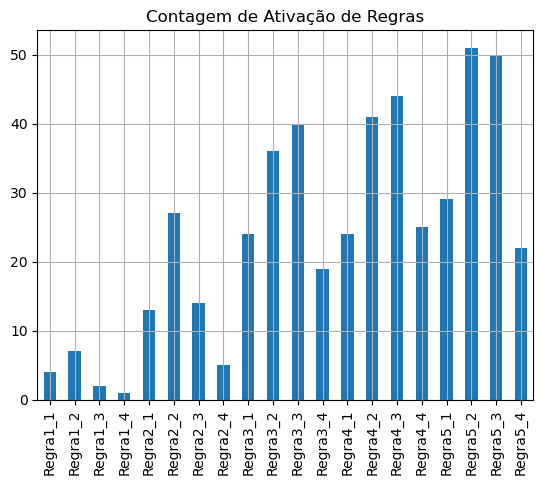

In [5]:
sr_rules_sum = df_rules.sum()
sr_rules_sum.plot(kind='bar',title='Contagem de Ativação de Regras', grid=True)

In [6]:
df_results = df.drop(['Regra1_1', 'Regra1_2', 'Regra1_3', 'Regra1_4','Regra2_1','Regra2_2','Regra2_3','Regra2_4','Regra3_1','Regra3_2','Regra3_3','Regra3_4','Regra4_1','Regra4_2','Regra4_3','Regra4_4','Regra5_1','Regra5_2','Regra5_3','Regra5_4'], axis=1)

In [7]:
df_results.head()

,Bateria,Taxa,PertinenciaLiga,PertinenciaNaoLiga,Saida,Class_saida
Index,,,,,,
0,100.00,55,0.04,0.00,0.00,1
1,99.67,18,0.05,0.05,47.76,0
2,99.33,48,0.06,0.00,0.00,1
3,99.00,59,0.08,0.00,0.00,1
4,98.66,41,0.09,0.00,0.00,1


c:\Users\Arthur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


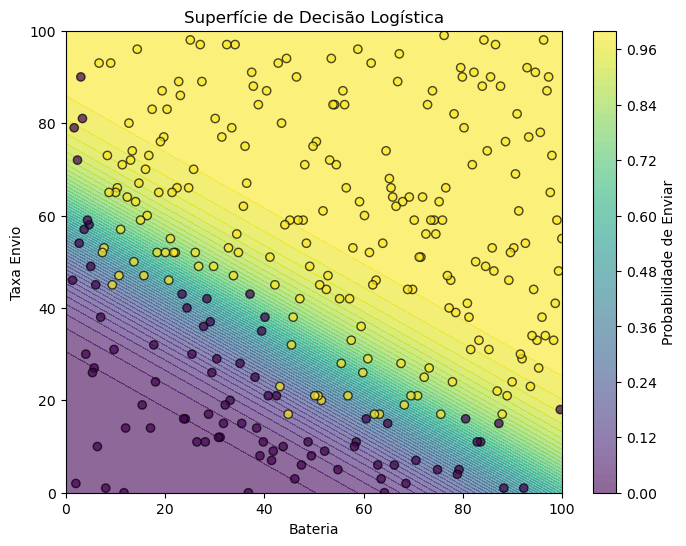

In [8]:
from sklearn.linear_model import LogisticRegression

# Variáveis
X = df_results[['Bateria', 'Taxa']]
y = df_results['Class_saida']

# Ajuste do modelo logístico 2D
model = LogisticRegression()
model.fit(X, y)

# Criando grade bidimensional
x_min, x_max = 0, 100
y_min, y_max = 0, 100

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1]
probs = probs.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Mapa de calor
plt.contourf(xx, yy, probs, levels=50, alpha=0.6)
plt.colorbar(label='Probabilidade de Enviar')

# Pontos reais
plt.scatter(df_results['Bateria'],
            df_results['Taxa'],
            c=y,
            edgecolors='k',
            alpha=0.7)

plt.xlabel('Bateria')
plt.ylabel('Taxa Envio')
plt.title('Superfície de Decisão Logística')
plt.show()

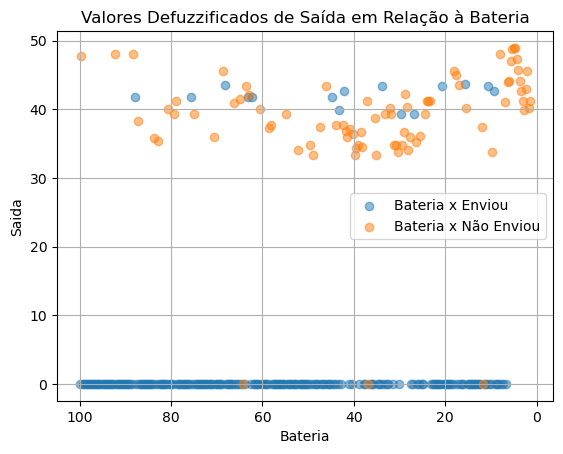

In [9]:
df_results_enviou = df_results[df_results['Class_saida'] == 1]
df_results_nenviou = df_results[df_results['Class_saida'] == 0]

plt.scatter(df_results_enviou['Bateria'], df_results_enviou['Saida'], label='Bateria x Enviou', alpha=0.5)
plt.scatter(df_results_nenviou['Bateria'], df_results_nenviou['Saida'], label='Bateria x Não Enviou', alpha=0.5)
plt.gca().invert_xaxis()  # Inverte o eixo X
plt.title('Valores Defuzzificados de Saída em Relação à Bateria')
plt.xlabel('Bateria')
plt.ylabel('Saida')
plt.legend()
plt.grid('on')
plt.show()

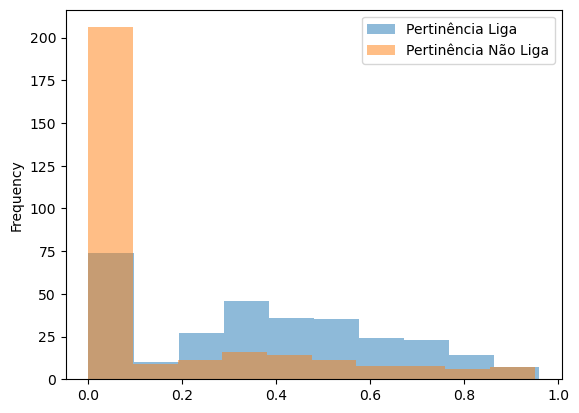

In [26]:
df_results['PertinenciaLiga'].plot(kind='hist', bins=10, label='Pertinência Liga', alpha=0.5)
df_results['PertinenciaNaoLiga'].plot(kind='hist', bins=10, label='Pertinência Não Liga', alpha=0.5)
plt.legend()

## Perguntas
* CSQ ou CSEQ o SIM7020E devolve?
* Porque a bateria na reserva? Ainda usa-se triangulação?

# Retirando Regras Redundantes

O objetivo é retirar as regras que sempre ativam ao mesmo tempo

In [23]:
# -> Basicamente, o programa identifica as colunas em que são ativadas todas as vezes ao mesmo tempo

def regras_redundantes(df, f1=0, f2=0):
    
    df_columns = df.columns
    
    # -> Declarando listas do tipo set, que garante a não repetição de dados, 
    # separando em listas de regras que não são úteis, pelas listas de regras que são.

    useless_rules_list = set({})
    usefull_rules_list = set({})
    
    # -> Para realizar a comparação de cada coluna com as outras posteriores,
    # é necessário declarar um for(for), onde o primeiro troca a coluna analisada, 
    # e o segundo troca as colunas que estão sendo comparadas com a coluna analisada

    for f1 in range(len(df.columns)):
        for f2 in range(len(df.columns)):
            
            # -> Se as colunas não forem iguais (evitando a comparação da coluna com ela mesma)
            if f1 != f2:
                
                # -> Usando um dataframe auxiliar que carrega 2 colunas: coluna analizada, e coluna comparada, 
                # em que suas linhas tem valores iguais a 1, e iguais entre sí
                df_aux1 = df.loc[(df[df_columns[f1]] == df[df_columns[f2]]) & (df[df_columns[f2]] == 1),]
                
                # -> Outro Dataframe auxiliar que carrega a coluna comparada, em que apenas possuem valores iguais a 1
                df_aux2 = df.loc[df[df_columns[f2]] == 1,]
                
                # -> O funcionamento do for(for) compara a coluna analisada com as outras colunas anteriores   
                # -> Será comparado então, de que se a coluna analizada tiver o mesmo tamanho que a coluna comparada, 
                # ou seja, sempre que a coluna analiasada é ativada, a coluna comparada também;
                if len(df_aux1[[df_columns[f1], df_columns[f2]]]) == len(df_aux2[df_columns[f2]]):
                    
                    # -> a coluna analisada será avaliada como sobreposta a àquela que foi comparada,
                    # pois a coluna comparada, de certa forma, terá mais ativações que a analisada,
                    # e vai sobressair a àquela que foi analisada.
                    useless_rules_list.add(df_columns[f1])
                    usefull_rules_list.add(df_columns[f2])

    print('Regras sobrepostas:\n',useless_rules_list)
    print(127*'-')
    print('Regras que sobressaem:\n',usefull_rules_list)

In [24]:
regras_redundantes(df_rules)

Regras sobrepostas:
 set()
-------------------------------------------------------------------------------------------------------------------------------
Regras que sobressaem:
 set()


# A sensibilidade de Regras Fuzzy

Até onde eu sei, a biblioteca eFLL (Embedded Fuzzy Logic Library) para lógica fuzzy em C++ oferece ferramentas para implementar sistemas de lógica fuzzy, mas não possui diretamente uma função embutida para avaliar a sensibilidade das regras em um controlador fuzzy.

A avaliação da sensibilidade das regras em um controlador fuzzy geralmente envolve técnicas analíticas ou métodos de otimização, como sensibilidade de parâmetros ou análise de influência das regras na saída do controlador. Essas análises podem ser implementadas independentemente do uso de uma biblioteca específica, usando métodos estatísticos ou de aprendizado de máquina para avaliar a importância das regras.

# Resultados

Aqui estão os resultados comparando a geração dos controladores criados